# SEMANA 12
## Pruebas de Hipótesis para Diferencias de Medias y Varianzas


**Objetivo:** Aplicar pruebas de hipótesis para comparar medias y varianzas en poblaciones normales y no normales, con simulaciones y visualizaciones en Python.

**Temario:**  
1. Poblaciones normales con varianza conocida  
2. Poblaciones normales con varianza desconocida (incluyendo prueba F)  
3. Poblaciones no normales con muestras grandes (n ≥ 30)


## Parte Poblaciones normales con varianza conocida


**Caso real:** *Control de calidad del peso de botellas entre dos proveedores.*


In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

mu1, mu2 = 500, 505
sigma = 10
n1, n2 = 30, 35
alfa = 0.05

np.random.seed(42)
x1 = np.random.normal(mu1, sigma, n1)
x2 = np.random.normal(mu2, sigma, n2)

delta_0 = 0
Z = (np.mean(x1) - np.mean(x2) - delta_0) / np.sqrt(sigma**2/n1 + sigma**2/n2)
## H_0 : m1=m2 
## H_1 : m1<m2

z = stats.norm.ppf(alfa)

print(f"Z: {Z:.4f}, z: {z:.4f}")


Z: -2.1009, z: -1.6449


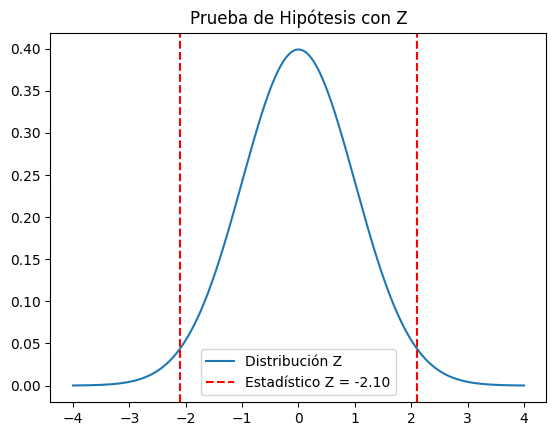

In [2]:

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

plt.plot(x, y, label='Distribución Z')
plt.axvline(Z, color='red', linestyle='--', label=f'Estadístico Z = {Z:.2f}')
plt.axvline(-Z, color='red', linestyle='--')
plt.title("Prueba de Hipótesis con Z")
plt.legend()
plt.show()


## Poblaciones normales con varianza desconocida


**Caso real:** *Comparar el peso promedio de empaques de dos máquinas diferentes, incluyendo la prueba F de igualdad de varianzas.*


In [3]:

peso_A = np.random.normal(1000, 5, 25)
peso_B = np.random.normal(1003, 7, 30)
n1 = 25
n2 = 30
# Prueba F
F = np.var(peso_A, ddof=1) / np.var(peso_B, ddof=1)
df1, df2 = len(peso_A)-1, len(peso_B)-1

f1 = stats.f.ppf(1-alfa/2,df1,df2)
f2 = stats.f.ppf(alfa/2,df1,df2)

print(f"¿F: {F:.4f} > {f1:.4f}? ó ¿F: {F:.4f}<{f2:.4f}?")

¿F: 0.6358 > 2.1540? ó ¿F: 0.6358<0.4510?


¿F<f? si, si rechazo la hipótesis nula, es decir no son iguales.

In [4]:
T = (np.mean(peso_A)- np.mean(peso_B))/ np.sqrt((np.var(peso_A, ddof=1) / n1) + (np.var(peso_B, ddof=1)/n2))

r = (((np.var(peso_A, ddof=1) / n1) + (np.var(peso_B, ddof=1) / n2))**2)/ ((((np.var(peso_A, ddof=1) / n1)**2)/(n1-1))+ (((np.var(peso_B, ddof=1) / n2)**2)/(n2-1)))

t= stats.t.ppf(alfa,r)
print(f"¿T: {T:.4f}<{t:.4f}?")


¿T: -1.5238<-1.6742?


No, no rechazo la hipotesis nula, por ende las las dos máquinas estadísticamente tienen el mismo peso

D:\Usuarios\jcastebe\AppData\Local\Temp\ipykernel_25008\1660905787.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([peso_A, peso_B], labels=["Máquina A", "Máquina B"])


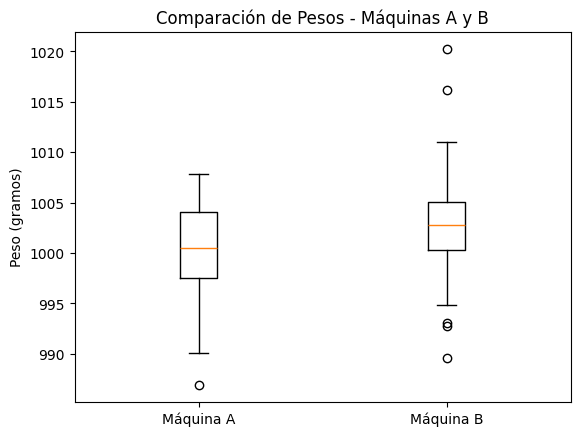

In [5]:

plt.boxplot([peso_A, peso_B], labels=["Máquina A", "Máquina B"])
plt.title("Comparación de Pesos - Máquinas A y B")
plt.ylabel("Peso (gramos)")
plt.show()


## Poblaciones no normales con n ≥ 30


**Caso real:** *Tiempos promedio de atención al cliente en dos sucursales.*


In [7]:

tiempos_suc_1 = np.random.gamma(shape=2, scale=10, size=50)
tiempos_suc_2 = np.random.gamma(shape=2, scale=12, size=55)

s1 = np.var(tiempos_suc_1, ddof=1)
s2 = np.var(tiempos_suc_2, ddof=1)

Z = (np.mean(tiempos_suc_1) - np.mean(tiempos_suc_2)) / np.sqrt(s1/len(tiempos_suc_1) + s2/len(tiempos_suc_2))
z = stats.norm.ppf(alfa)

print(f"¿Z: {Z:.4f}< z: {z:.4f}?")


¿Z: -1.6392< z: -1.6449?


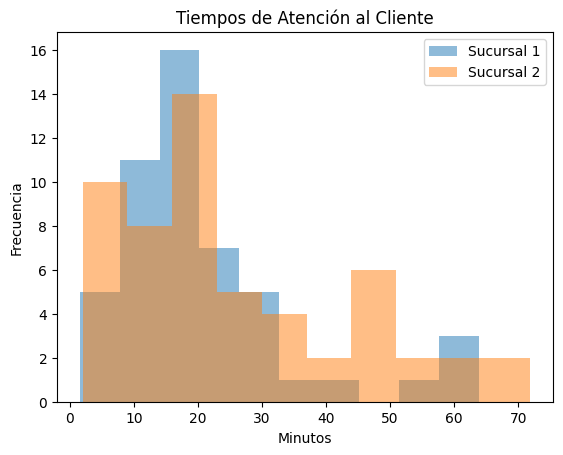

In [8]:

plt.hist(tiempos_suc_1, alpha=0.5, label='Sucursal 1')
plt.hist(tiempos_suc_2, alpha=0.5, label='Sucursal 2')
plt.title("Tiempos de Atención al Cliente")
plt.xlabel("Minutos")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


## Prueba de hipótesis para diferencia de proporciones

**Caso real:**
Una empresa quiere comparar la tasa de defectos de dos líneas de producción:

Línea A: De 200 productos revisados, 30 son defectuosos.

Línea B: De 180 productos revisados, 20 son defectuosos.

La empresa quiere saber si hay una diferencia significativa en las proporciones de defectos entre ambas líneas.



In [11]:
import numpy as np
from scipy import stats

# Datos
x1, n1 = 30, 200  # Línea A: 30 defectos en 200 productos
x2, n2 = 20, 180  # Línea B: 20 defectos en 180 productos

p1 = x1 / n1
p2 = x2 / n2

# Proporción combinada 
p_comb = (x1 + x2) / (n1 + n2)

# Estadístico Z
Z = (p1 - p2) / np.sqrt(p_comb * (1 - p_comb) * (1/n1 + 1/n2))

# P-valor (prueba bilateral)
z = stats.norm.ppf(1-alfa)

print(f"Proporción Línea A: {p1:.4f}")
print(f"Proporción Línea B: {p2:.4f}")
print(f"Estadístico Z: {Z:.4f}")
print(f"z: {z:.4f}")

print(f"¿Z: {Z:.4f}> z: {z:.4f}?")

Proporción Línea A: 0.1500
Proporción Línea B: 0.1111
Estadístico Z: 1.1198
z: 1.6449
¿Z: 1.1198> z: 1.6449?


No, no rechazo hipotesis nula......


## Conclusión

**Resumen de aprendizajes:**  
- Cuándo usar Z, T o F.
- Importancia de analizar varianzas antes de comparar medias.
- Cómo el tamaño de muestra permite usar métodos paramétricos en datos no normales.

